###Headings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
dir = '/content/gdrive/MyDrive/Titanic'

###Data Creating

In [4]:
titanic = pd.read_csv(f"{dir}/train.csv")

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
from sklearn.model_selection import train_test_split

In [130]:
train_set, test_set = train_test_split(titanic, test_size=0.001, random_state=21)

In [131]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S


In [132]:
print(len(test_set))

1


###Data Modifying

In [268]:
data = train_set.copy()

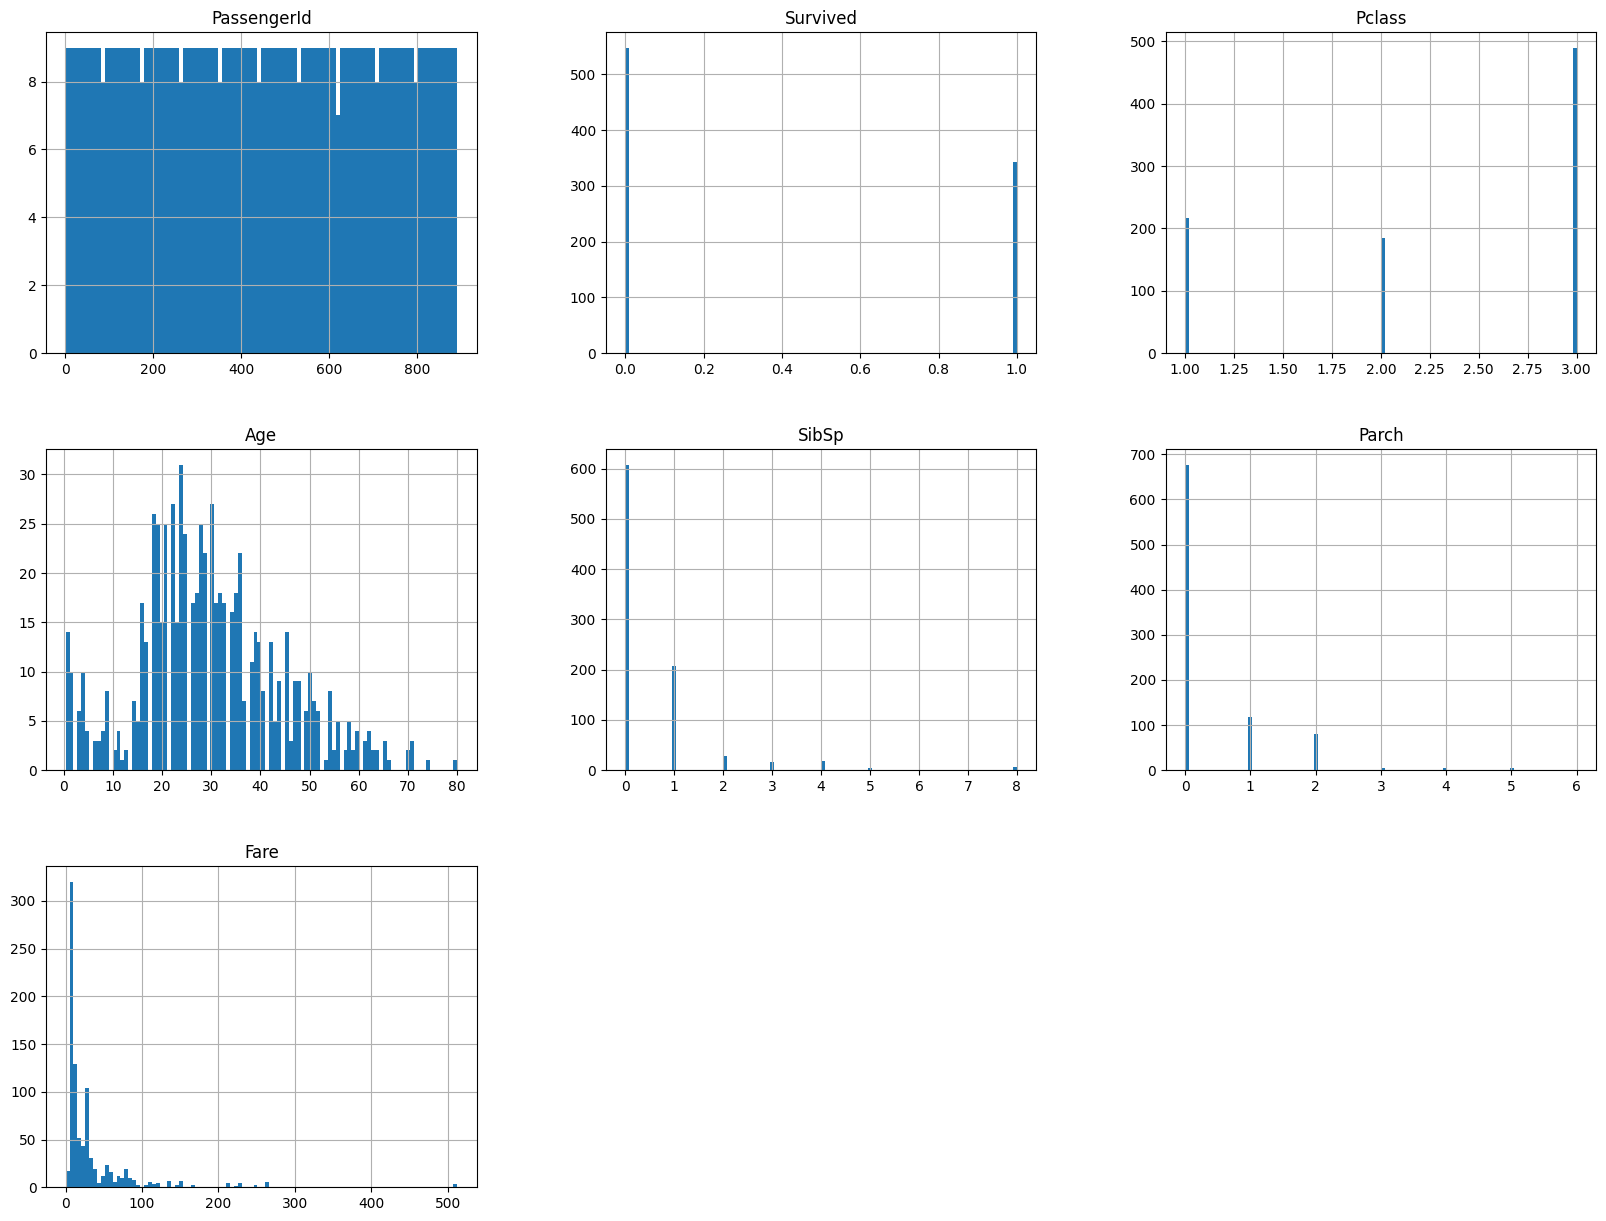

In [269]:
data.hist(bins=100, figsize=(20,15))
plt.show()

In [270]:
corr_matrix = data.corr()
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.004416 -0.035788  0.037094 -0.057873 -0.001297   
Survived       -0.004416  1.000000 -0.337996 -0.077557 -0.034955  0.081248   
Pclass         -0.035788 -0.337996  1.000000 -0.369132  0.082720  0.018893   
Age             0.037094 -0.077557 -0.369132  1.000000 -0.308133 -0.189343   
SibSp          -0.057873 -0.034955  0.082720 -0.308133  1.000000  0.415164   
Parch          -0.001297  0.081248  0.018893 -0.189343  0.415164  1.000000   
Fare            0.012906  0.257124 -0.549442  0.095954  0.159835  0.216092   

                 Fare  
PassengerId  0.012906  
Survived     0.257124  
Pclass      -0.549442  
Age          0.095954  
SibSp        0.159835  
Parch        0.216092  
Fare         1.000000  


<ipython-input-270-f50fb7f1b89e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [271]:
def dropColumn(df):
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    return df

In [272]:
data = dropColumn(data)

In [273]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
379,0,3,male,19.0,0,0,7.7750,S
725,0,3,male,20.0,0,0,8.6625,S
826,0,3,male,NaN,0,0,56.4958,S
450,0,2,male,36.0,1,2,27.7500,S
147,0,3,female,9.0,2,2,34.3750,S


In [274]:
data1 = data.reset_index()

In [275]:
c = 0
q = 0
s = 0
for i in range(len(data1)):
  if(data1.loc[i, 'Embarked'] == 'C'):
    c+=1
  if(data1.loc[i, 'Embarked'] == 'Q'):
    q+=1
  if(data1.loc[i, 'Embarked'] == 'S'):
    s+=1
print(c, q, s)

168 77 643


In [276]:
c = 0
q = 0
s = 0
for i in range(len(data1)):
  if(data1.loc[i, 'Embarked'] == 'C' and data1.loc[i, 'Survived'] == 1):
    c+=1
  if(data1.loc[i, 'Embarked'] == 'Q' and data1.loc[i, 'Survived'] == 1):
    q+=1
  if(data1.loc[i, 'Embarked'] == 'S' and data1.loc[i, 'Survived'] == 1):
    s+=1
print(c, q, s)


93 30 217


In [277]:
data['Embarked'].isna().sum()

2

In [278]:
def completeData(df):
  avg_age = df["Age"].mean()
  df = df.reset_index()
  # df.fillna(avg_age+20)
  df['Age'] = df['Age'].replace(np.nan, avg_age+32)
  df['Embarked'] = df['Embarked'].replace(np.nan, 2)
  df = df.drop(['index'], axis=1)
  for i in range(len(df)):
    if(df.loc[i, 'Sex'] == 'male'):
      df.loc[i, 'Sex'] = 1
    else:
      df.loc[i, 'Sex'] = -1
    if(df.loc[i, 'Embarked'] == 'C'):
      df.loc[i, 'Embarked'] = 3
    if(df.loc[i, 'Embarked'] == 'Q'):
      df.loc[i, 'Embarked'] = 2
    if(df.loc[i, 'Embarked'] == 'S'):
      df.loc[i, 'Embarked'] = 1

  return df


In [279]:
data = completeData(data)

In [280]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,19.000000,0,0,7.7750,1
1,0,3,1,20.000000,0,0,8.6625,1
2,0,3,1,61.704306,0,0,56.4958,1
3,0,2,1,36.000000,1,2,27.7500,1
4,0,3,-1,9.000000,2,2,34.3750,1


In [281]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [282]:
corr_matrix = data.corr(numeric_only=False)
print(corr_matrix)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.337996 -0.545307 -0.114962 -0.034955  0.081248   
Pclass   -0.337996  1.000000  0.133350 -0.114671  0.082720  0.018893   
Sex      -0.545307  0.133350  1.000000  0.098001 -0.114101 -0.246496   
Age      -0.114962 -0.114671  0.098001  1.000000 -0.152407 -0.215152   
SibSp    -0.034955  0.082720 -0.114101 -0.152407  1.000000  0.415164   
Parch     0.081248  0.018893 -0.246496 -0.215152  0.415164  1.000000   
Fare      0.257124 -0.549442 -0.183027 -0.005478  0.159835  0.216092   
Embarked  0.170820 -0.166070 -0.113130  0.127979 -0.069303 -0.041464   

              Fare  Embarked  
Survived  0.257124  0.170820  
Pclass   -0.549442 -0.166070  
Sex      -0.183027 -0.113130  
Age      -0.005478  0.127979  
SibSp     0.159835 -0.069303  
Parch     0.216092 -0.041464  
Fare      1.000000  0.227264  
Embarked  0.227264  1.000000  


In [283]:
def dropColumn2(df):
    df = df.drop(['SibSp', 'Parch'], axis=1)
    return df

In [284]:
data = dropColumn2(data)

In [285]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,19.000000,7.7750,1
1,0,3,1,20.000000,8.6625,1
2,0,3,1,61.704306,56.4958,1
3,0,2,1,36.000000,27.7500,1
4,0,3,-1,9.000000,34.3750,1


In [286]:
corr_matrix = data.corr(numeric_only=False)
print(corr_matrix)

          Survived    Pclass       Sex       Age      Fare  Embarked
Survived  1.000000 -0.337996 -0.545307 -0.114962  0.257124  0.170820
Pclass   -0.337996  1.000000  0.133350 -0.114671 -0.549442 -0.166070
Sex      -0.545307  0.133350  1.000000  0.098001 -0.183027 -0.113130
Age      -0.114962 -0.114671  0.098001  1.000000 -0.005478  0.127979
Fare      0.257124 -0.549442 -0.183027 -0.005478  1.000000  0.227264
Embarked  0.170820 -0.166070 -0.113130  0.127979  0.227264  1.000000


###Feature Label split and Other

In [287]:
mydata = data.copy()

In [288]:
def Splitting(data, label):
    data_x = data.drop(label, axis=1)
    data_y = pd.DataFrame(data[label])
    return data_x, data_y

In [289]:
data_x, data_y = Splitting(mydata, 'Survived')

In [290]:
data_x.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,19.000000,7.7750,1
1,3,1,20.000000,8.6625,1
2,3,1,61.704306,56.4958,1
3,2,1,36.000000,27.7500,1
4,3,-1,9.000000,34.3750,1


In [291]:
data_y.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [292]:
s = 0
for i in range(len(data_y)):
  if(data_y.loc[i, 'Survived'] == 1):
    s+=1
print(s, len(data_y))

342 890


###Final Step (With test data)

In [293]:
def Pipe(df, label):
  df = dropColumn(df)
  df = completeData(df)
  df = dropColumn2(df)
  x, y = Splitting(df, label)
  return x, y

In [294]:
test_x, test_y = Pipe(test_set, 'Survived')

In [295]:
test_x.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,-1,26.0,16.1,1


In [296]:
test_x.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,-1,26.0,16.1,1


In [297]:
from sklearn.preprocessing import StandardScaler

In [298]:
sc_x = StandardScaler()
data_x = sc_x.fit_transform(data_x)
test_x = sc_x.transform(test_x)

In [299]:
print(data_x)

[[ 0.82816049  0.73651952 -0.93648603 -0.49199155 -0.58916242]
 [ 0.82816049  0.73651952 -0.88161922 -0.47413099 -0.58916242]
 [ 0.82816049  0.73651952  1.40656319  0.48849379 -0.58916242]
 ...
 [-0.36837009 -1.35773726  1.14845292 -0.43715208 -0.58916242]
 [ 0.82816049  0.73651952 -1.86922188  0.15023392 -0.58916242]
 [ 0.82816049  0.73651952 -0.55241833 -0.27036968  1.93784746]]


In [300]:
data_y = data_y.to_numpy().reshape(len(data_y))
test_y = test_y.to_numpy().reshape(len(test_y))

In [301]:
test_y

array([0])

###All

In [302]:
all_pred = [0 for _ in range(len(test_x))]

###Model

In [303]:
from sklearn.linear_model import LogisticRegression

In [304]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(data_x, data_y)

LogisticRegression(random_state=0)

In [305]:
y_pred = classifier.predict(test_x)
all_pred += y_pred

In [306]:
from sklearn.metrics import confusion_matrix

In [307]:
cm = confusion_matrix(test_y, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[0 1]
 [0 0]]


In [308]:
from sklearn.metrics import accuracy_score

In [309]:
print ("Accuracy : ", accuracy_score(test_y, y_pred))

Accuracy :  0.0


###Iterative model

In [90]:
y_pred1 = [0 for _ in range(len(test_x))]
for i in range(100):
  classifier = LogisticRegression(random_state = i)
  classifier.fit(data_x, data_y)
  y_pred = classifier.predict(test_x)
  y_pred1 += y_pred
# y_pred1 = y_pred1//(100)

In [91]:
y_pred1

array([100,   0,   0,   0,   0, 100,   0,   0,   0,   0, 100, 100,   0,
         0,   0,   0,   0,   0, 100, 100, 100, 100,   0,   0, 100, 100,
         0])

In [92]:
print ("Accuracy : ", accuracy_score(test_y, y_pred1))

Accuracy :  0.5925925925925926


###Original Testing

In [310]:
test_data_uk = pd.read_csv(f"{dir}/test.csv")

In [311]:
def PipeforTest(df):
  df = dropColumn(df)
  df = completeData(df)
  df = dropColumn2(df)
  return df

In [312]:
test_data_uk_x = PipeforTest(test_data_uk)

In [313]:
test_data_uk_x.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,34.5,7.8292,2
1,3,-1,47.0,7.0000,1
2,2,1,62.0,9.6875,2
3,3,1,27.0,8.6625,1
4,3,-1,22.0,12.2875,1


In [314]:
test_data_uk_x.isnull().values.any()

True

In [315]:
test_data_uk_x['Fare'].isnull().sum()

1

In [316]:
avg_fare = test_data_uk_x['Fare'].mean()
test_data_uk_x = test_data_uk_x.fillna(avg_fare)

In [317]:
test_data_uk_x.isnull().values.any()

False

In [318]:
final_test = sc_x.transform(test_data_uk_x)

In [319]:
final_test

array([[ 0.82816049,  0.73651952, -0.08605041, -0.49090079,  0.67434252],
       [ 0.82816049, -1.35773726,  0.59978478, -0.50758809, -0.58916242],
       [-0.36837009,  0.73651952,  1.42278699, -0.4535033 ,  0.67434252],
       ...,
       [ 0.82816049,  0.73651952,  0.13341685, -0.50255695, -0.58916242],
       [ 0.82816049,  0.73651952,  1.43774316, -0.48645729, -0.58916242],
       [ 0.82816049,  0.73651952,  1.43774316, -0.19850885,  1.93784746]])

In [320]:
final_pred = classifier.predict(final_test)

In [321]:
final_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

###Final Answer

In [184]:
submission = pd.read_csv(f"{dir}/gender_submission.csv")

In [185]:
len(final_pred)

418

In [186]:
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = final_pred[i]

In [187]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [188]:
submission.to_csv(f'{dir}/subm1_3.csv', index=False)

###Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
model2 = DecisionTreeClassifier()
model2.fit(data_x, data_y)

DecisionTreeClassifier()

In [112]:
y_pred2 = model2.predict(test_x)
all_pred += y_pred2
print ("Accuracy : ", accuracy_score(test_y, y_pred2))

Accuracy :  0.7777777777777778


In [113]:
y_pred2

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1])

In [114]:
final_pred2 = model2.predict(final_test)

In [115]:
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = final_pred2[i]
submission.to_csv(f'{dir}/subm2_2.csv', index=False)

###Random Forest

In [322]:
from sklearn.ensemble import RandomForestClassifier

In [323]:
model3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model3.fit(data_x, data_y)

RandomForestClassifier(max_depth=5, random_state=1)

In [324]:
y_pred3 = model3.predict(test_x)
all_pred += y_pred3
print ("Accuracy : ", accuracy_score(test_y, y_pred3))

Accuracy :  0.0


In [325]:
final_pred3 = model3.predict(final_test)

In [326]:
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = final_pred3[i]
submission.to_csv(f'{dir}/subm3_4.csv', index=False)

In [327]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


###Iterative RF

In [195]:
import tqdm

In [196]:
y_pred1 = [0 for _ in range(len(test_x))]
y_pred_f = [0 for _ in range(len(final_test))]
for i in range(20):
  classifier = RandomForestClassifier(n_estimators=10*i+20, max_depth=5, random_state=i)
  classifier.fit(data_x[:i*35+1], data_y[:i*35+1])
  y_pred = classifier.predict(test_x)
  y_pred1 += y_pred
  final_pred3 = model3.predict(final_test)
  y_pred_f += final_pred3
# y_pred1 = y_pred1//(100)

In [197]:
y_pred_f

array([ 0, 20,  0,  0, 20,  0, 20,  0, 20,  0,  0,  0, 20,  0, 20, 20,  0,
        0, 20, 20,  0,  0, 20,  0, 20,  0, 20,  0,  0,  0,  0,  0, 20,  0,
        0,  0, 20,  0,  0,  0,  0,  0,  0, 20, 20,  0,  0,  0, 20, 20,  0,
        0, 20, 20,  0,  0,  0,  0,  0, 20,  0,  0,  0, 20, 20, 20, 20,  0,
        0, 20, 20,  0, 20,  0, 20,  0,  0, 20,  0, 20, 20,  0,  0,  0,  0,
        0, 20,  0, 20, 20, 20,  0, 20,  0,  0,  0, 20,  0, 20,  0, 20,  0,
        0,  0, 20,  0,  0,  0,  0,  0,  0, 20, 20, 20, 20,  0,  0, 20,  0,
       20, 20,  0, 20,  0,  0, 20,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,
       20,  0,  0, 20, 20,  0, 20, 20, 20, 20,  0,  0,  0,  0,  0, 20,  0,
        0,  0,  0,  0,  0, 20, 20,  0, 20, 20,  0,  0, 20,  0, 20,  0, 20,
        0,  0,  0,  0,  0,  0,  0, 20,  0, 20, 20,  0, 20, 20, 20,  0, 20,
        0,  0, 20,  0, 20,  0,  0,  0,  0, 20, 20,  0, 20,  0, 20,  0, 20,
        0, 20,  0, 20, 20

In [ ]:
y_pred11 = []
for y in y_pred1:
  if(y > 10):
    y_pred11.append(1)
  else:
    y_pred11.append(0)
# print(y_pred11)

In [ ]:
print ("Accuracy : ", accuracy_score(test_y, y_pred11))

Accuracy :  0.8222222222222222


In [ ]:
y_pred11 = np.array(y_pred11)

In [ ]:
y_pred11

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [ ]:
test_y

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

###Deep Learning - MLP

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [ ]:
model = Sequential([
    Flatten(input_shape=(3, )),
    Dense(4, activation='sigmoid'),
    Dense(4, activation='sigmoid'),
    Dense(2, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(data_x, data_y, epochs=100,
          batch_size=4,
          validation_split=0.2)

Epoch 1/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5184 - accuracy: 0.7734 - val_loss: 0.4769 - val_accuracy: 0.8075
Epoch 2/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5178 - accuracy: 0.7734 - val_loss: 0.4756 - val_accuracy: 0.8012
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5167 - accuracy: 0.7734 - val_loss: 0.4750 - val_accuracy: 0.8075
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5157 - accuracy: 0.7719 - val_loss: 0.4742 - val_accuracy: 0.8075
Epoch 5/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5146 - accuracy: 0.7719 - val_loss: 0.4734 - val_accuracy: 0.8012
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5135 - accuracy: 0.7719 - val_loss: 0.4723 - val_accuracy: 0.8012
Epoch 7/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5124 - accuracy: 0.7719 - val_loss: 0.4710 - val_accuracy: 0.8012

In [ ]:
y_pred4 = model.predict(test_x)

3/3 [==============================] - 0s 4ms/step


In [ ]:
y_pred4[:5]

array([[0.72122806, 0.308889  ],
       [0.6860751 , 0.338973  ],
       [0.71398556, 0.31517032],
       [0.25764114, 0.6929128 ],
       [0.39724252, 0.5703763 ]], dtype=float32)

In [ ]:
y_pred_4 = []
for p in y_pred4:
  y_pred_4.append(np.argmax(p))

In [ ]:
y_pred_4 = np.array(y_pred_4)

In [ ]:
y_pred_4

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [ ]:
print ("Accuracy : ", accuracy_score(test_y, y_pred_4))

Accuracy :  0.8666666666666667


In [ ]:
final_pred4 = model.predict(final_test)

14/14 [==============================] - 0s 3ms/step


In [ ]:
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = np.argmax(final_pred4[i])
submission.to_csv(f'{dir}/subm4.csv', index=False)

###KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
clf = KNeighborsClassifier(n_neighbors = 2)

In [125]:
clf.fit(data_x, data_y)

KNeighborsClassifier(n_neighbors=2)

In [126]:
y_pred5 = clf.predict(test_x)
all_pred += y_pred5
print ("Accuracy : ", accuracy_score(test_y, y_pred5))

Accuracy :  0.8148148148148148


In [127]:
final_pred5 = clf.predict(final_test)

In [128]:
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = final_pred5[i]
submission.to_csv(f'{dir}/subm5_1.csv', index=False)

###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model = GNBclf.fit(data_x, data_y)
preds6 = GNBclf.predict(test_x)

In [ ]:
all_pred += preds6
print ("Accuracy : ", accuracy_score(test_y, preds6))

Accuracy :  0.8222222222222222


In [ ]:
final_pred6 = clf.predict(final_test)
for i in range(len(submission)):
  submission.loc[i, 'Survived'] = final_pred6[i]
submission.to_csv(f'{dir}/subm6.csv', index=False)

###All Pred

In [ ]:
all_pred = np.array(all_pred)

In [ ]:
all_pred

array([1, 0, 0, 5, 3, 5, 4, 0, 4, 5, 1, 0, 0, 0, 0, 5, 1, 5, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 0, 0, 3, 0, 5, 1, 4, 0, 1, 1, 4, 5, 0, 0, 0, 0, 0,
       4, 1, 0, 0, 0, 2, 5, 5, 0, 5, 0, 5, 0, 5, 5, 3, 1, 5, 5, 0, 0, 5,
       0, 1, 0, 5, 5, 5, 2, 5, 0, 0, 3, 5, 5, 4, 0, 5, 5, 0, 0, 0, 5, 5,
       0, 0])

In [ ]:
test_y

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [ ]:
all_pred_2 = []
for y in all_pred:
  if(y > 0):
    all_pred_2.append(1)
  else:
    all_pred_2.append(0)

In [ ]:
all_pred_2 = np.array(all_pred_2)

In [ ]:
all_pred_2

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [ ]:
print ("Accuracy : ", accuracy_score(test_y, all_pred_2))

Accuracy :  0.8
